###Display the local connectivity kernel definining the local coupling strength for one focal point

``Run time``: approximately 35 s (geodist step of local Connect)

``Memory requirement``: < 1 GB

In [2]:
from tvb.datatypes.cortex import Cortex
from tvb.datatypes.local_connectivity import LocalConnectivity

from tvb.simulator.lab import *

###Perform the simulation  

In [3]:
LOG.info("Configuring...")

In [4]:
#Initialise a surface:
#First define the function describing the "local" connectivity.
grey_matter = LocalConnectivity(cutoff=20.0)
grey_matter.equation.parameters['sigma'] = 10.0
grey_matter.equation.parameters['amp'] = 1.0

In [5]:
#then a scaling factor, to adjust the strength of the local connectivity 
local_coupling_strength = numpy.array([0.0115])

In [6]:
#finally, create a default cortex that includes the custom local connectivity.
default_cortex = Cortex.from_file()
default_cortex.local_connectivity = grey_matter
default_cortex.coupling_strength = local_coupling_strength
default_cortex.configure()

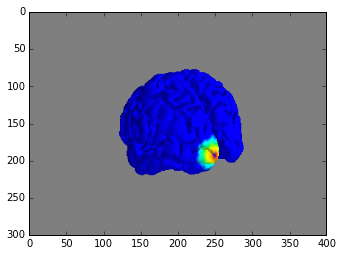

In [12]:
# define scalar data to colour the surface 
lc = default_cortex.local_connectivity.matrix[:, 0].todense()
try:
    from tvb.simulator.plot.tools import mlab
    surface_pattern(default_cortex, lc)
    #Show them
    show()
    imshow(mlab.screenshot())
except ImportError:
    LOG.exception("Could not display!")
    pass